##  Diabetes Risk Stratification - Demographic with SIM

In [2]:
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns

# Import the data set 

In [15]:
#dataset = pd.read_csv("C:/Documents/datasets/dg.csv")
dataset = pd.read_csv("C:/Data/Diabetes/dg.csv")


# Examine the data set - Descriptive Statistics

In [16]:
dataset.head(5)   #provides top 5 rows

,Patient Ordinal,Birth Date,Age,Decade,Gender,Simulated Family Member with Diabetes,Simulated Activity Level,Simulated Hypertension,Simutated Height CM,Simutated Weight KG,Simulated BMI,ADA Family Risk,ADA Age Risk,ADA Gender Risk,ADA BMI Risk,ADA Hypertension Risk,Total Calculated ADA pre-Diabetes Rsik,Simulated Imputed Diabetic Metabolic Syndrome (OUTCOME)
0,Patient_2018_1,04/12/72,49,4,Male,0,0,1,163,24,38,0,1,1,3,1,6,1
1,Patient_2018_2,09/03/47,73,7,Female,0,1,1,182,18,26,0,3,1,0,1,5,0
2,Patient_2018_3,09/16/71,49,4,Male,0,1,1,168,25,37,0,1,1,3,1,6,1
3,Patient_2018_4,01/08/34,87,8,Female,1,1,1,168,19,41,1,3,0,3,1,8,0
4,Patient_2018_5,05/12/34,87,8,Male,0,1,1,164,21,37,0,3,1,3,1,8,0


In [17]:
dataset.shape #print the shape of the matrix

(31546, 18)

In [18]:
dataset.isnull().values.any()  # determine if any of the dataset is null

False

# Establish a correlation Matrix 

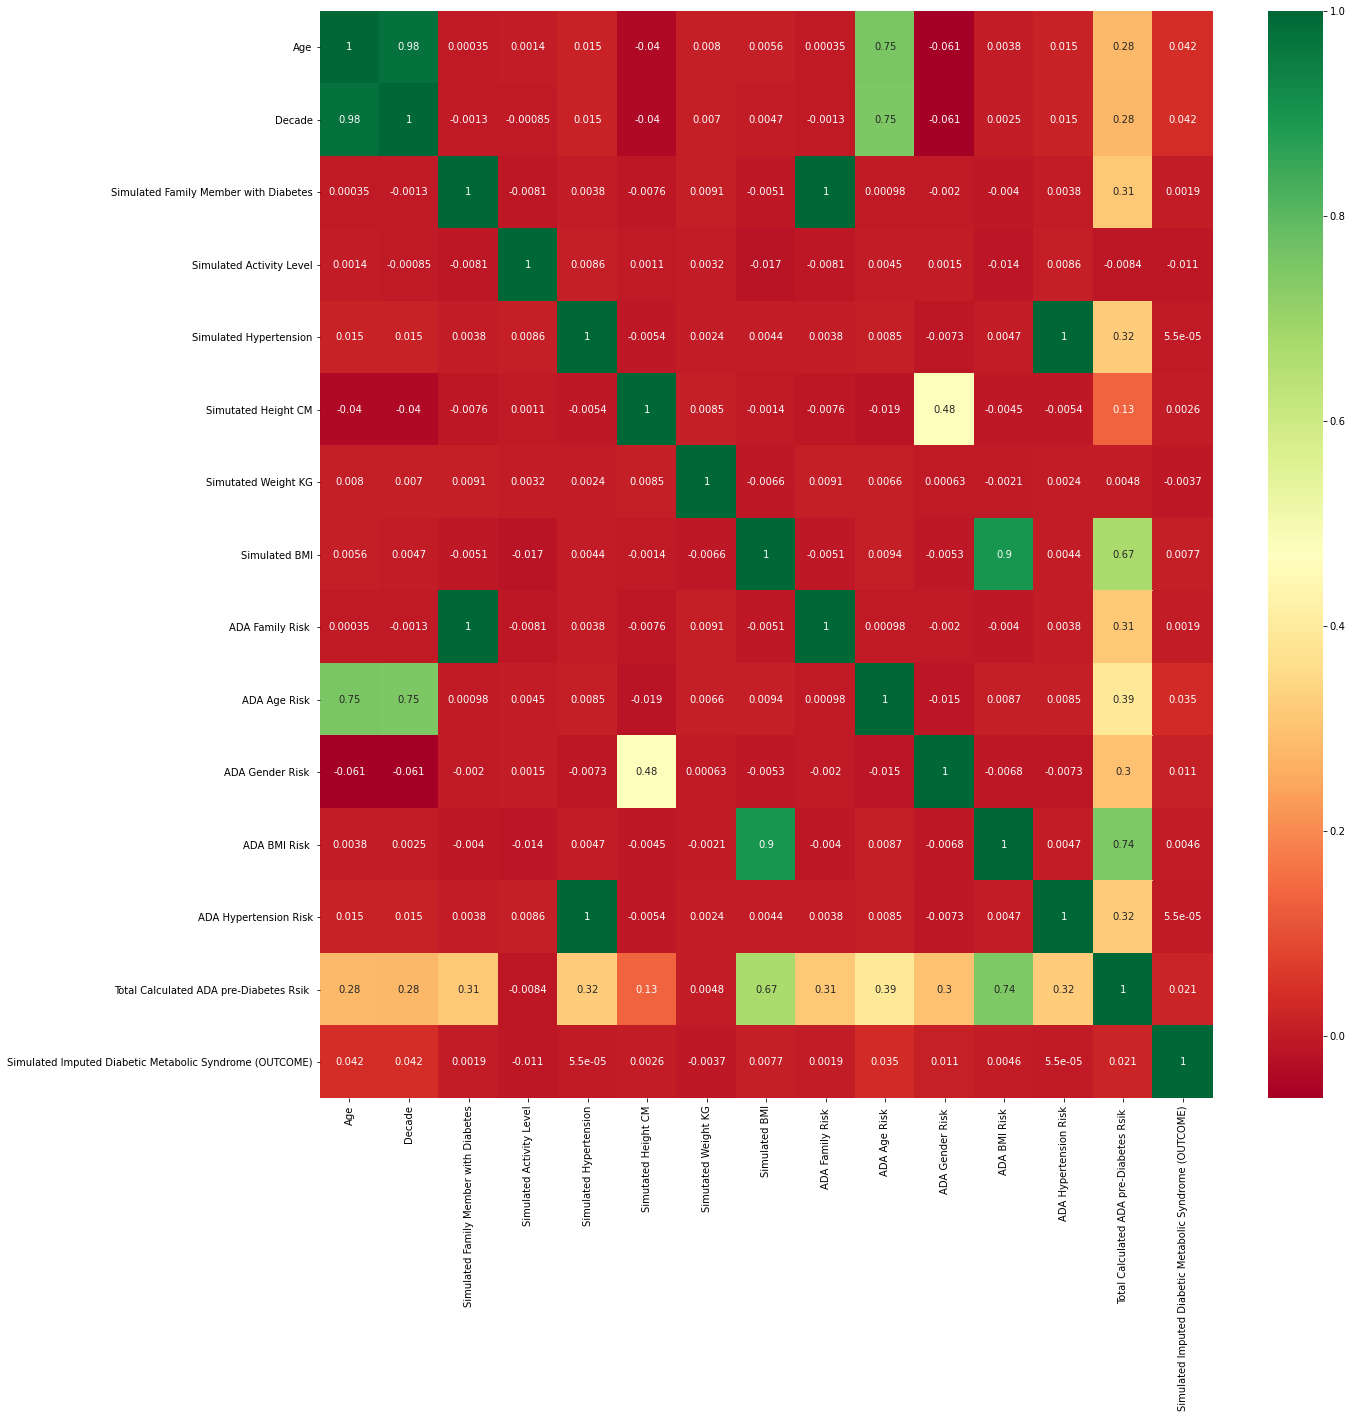

In [19]:
correlation_matrix = dataset.corr()     #establish a correlation matrix for all fields
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_correlation_features].corr(),annot=True,cmap="RdYlGn")


In [20]:
dataset.corr()

,Age,Decade,Simulated Family Member with Diabetes,Simulated Activity Level,Simulated Hypertension,Simutated Height CM,Simutated Weight KG,Simulated BMI,ADA Family Risk,ADA Age Risk,ADA Gender Risk,ADA BMI Risk,ADA Hypertension Risk,Total Calculated ADA pre-Diabetes Rsik,Simulated Imputed Diabetic Metabolic Syndrome (OUTCOME)
Age,1.000000,0.975713,0.000349,0.001367,0.014665,-0.040114,0.008037,0.005569,0.000349,0.754479,-0.060697,0.003825,0.014665,0.281721,0.041907
Decade,0.975713,1.000000,-0.001315,-0.000847,0.014595,-0.039759,0.006996,0.004720,-0.001315,0.750923,-0.060936,0.002543,0.014595,0.278764,0.042017
Simulated Family Member with Diabetes,0.000349,-0.001315,1.000000,-0.008122,0.003807,-0.007584,0.009112,-0.005144,1.000000,0.000975,-0.002043,-0.004026,0.003807,0.313859,0.001886
Simulated Activity Level,0.001367,-0.000847,-0.008122,1.000000,0.008562,0.001107,0.003188,-0.017022,-0.008122,0.004493,0.001526,-0.014456,0.008562,-0.008376,-0.010787
Simulated Hypertension,0.014665,0.014595,0.003807,0.008562,1.000000,-0.005375,0.002360,0.004406,0.003807,0.008452,-0.007258,0.004685,1.000000,0.321603,0.000055
Simutated Height CM,-0.040114,-0.039759,-0.007584,0.001107,-0.005375,1.000000,0.008533,-0.001361,-0.007584,-0.018669,0.477255,-0.004516,-0.005375,0.134652,0.002649
Simutated Weight KG,0.008037,0.006996,0.009112,0.003188,0.002360,0.008533,1.000000,-0.006608,0.009112,0.006633,0.000628,-0.002092,0.002360,0.004844,-0.003699
Simulated BMI,0.005569,0.004720,-0.005144,-0.017022,0.004406,-0.001361,-0.006608,1.000000,-0.005144,0.009429,-0.005319,0.898128,0.004406,0.668931,0.007669
ADA Family Risk,0.000349,-0.001315,1.000000,-0.008122,0.003807,-0.007584,0.009112,-0.005144,1.000000,0.000975,-0.002043,-0.004026,0.003807,0.313859,0.001886
ADA Age Risk,0.754479,0.750923,0.000975,0.004493,0.008452,-0.018669,0.006633,0.009429,0.000975,1.000000,-0.015038,0.008668,0.008452,0.393232,0.035487


In [8]:
diabetes_map = {True: 1, False: 0}
dataset['Diabetes'] = dataset['Outcome'].map(diabetes_map)
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [11]:
diabetes_true_count = len(dataset.loc[dataset['Diabetes'] == True])
diabetes_false_count = len(dataset.loc[dataset['Diabetes'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [12]:
## Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Diabetes']

In [13]:
X = dataset[feature_columns].values
y = dataset[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [15]:
print("total number of rows : {0}".format(len(dataset)))
print("number of rows missing Glucose: {0}".format(len(dataset.loc[dataset['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(dataset.loc[dataset['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(dataset.loc[dataset['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(dataset.loc[dataset['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(dataset.loc[dataset['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(dataset.loc[dataset['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [29]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [30]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [31]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10, random_state=10)

In [32]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.736


In [33]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [35]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [36]:
classifier=xgboost.XGBClassifier()


In [37]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [38]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    3.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished
C:\Users\josep\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 4.82 seconds.


In [40]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [42]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

[14:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\josep\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoostError: [14:41:12] c:\users\administrator\workspace\xgboost-win64_release_1.4.0\src\c_api\c_api_utils.h:161: Invalid missing value: null

In [43]:
score

NameError: name 'score' is not defined